In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import lognorm
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('/Users/adminsha/Downloads/StudentPerformanceFactors.csv')
df.head(12)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [4]:
frequency_table = df['Exam_Score'].value_counts().sort_index()

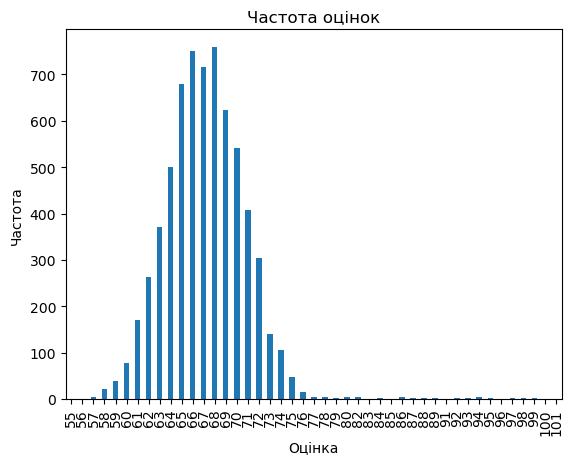

In [5]:
frequency_table.plot(kind='bar')
plt.xlabel('Оцінка')
plt.ylabel('Частота')
plt.title('Частота оцінок')
plt.show()

In [6]:
skewness = df['Exam_Score'].skew()
print(f'Коефіцієнт асиметрії: {skewness}')
##присутня позитивна асиметрія, дже коефіцієнт додатній. Рішення - логарифмування.

Коефіцієнт асиметрії: 1.6448082853982677


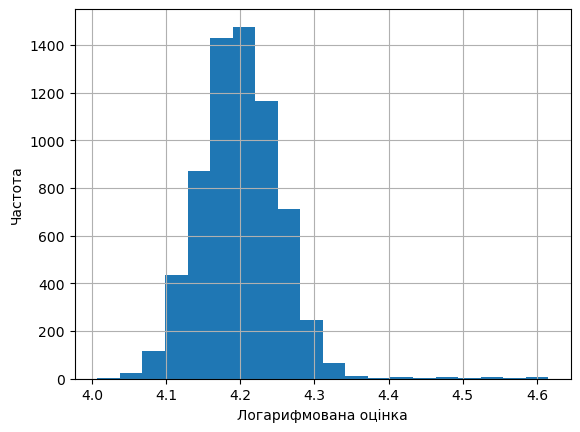

In [7]:
log = df['Exam_Score'].apply(np.log).hist(bins=20)
plt.xlabel('Логарифмована оцінка')
plt.ylabel('Частота')
plt.show()
##логнормальний розподіл оцінок

In [8]:
frequency_sleep_table = df['Sleep_Hours'].value_counts().sort_index()

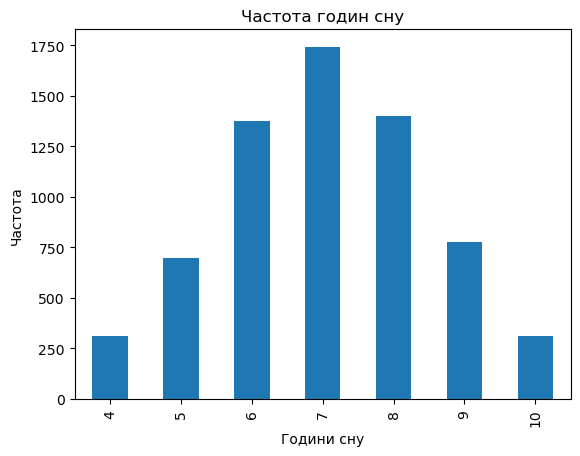

In [9]:
frequency_sleep_table.plot(kind='bar')
plt.xlabel('Години сну')
plt.ylabel('Частота')
plt.title('Частота годин сну')
plt.show()
##нормальний розподіл

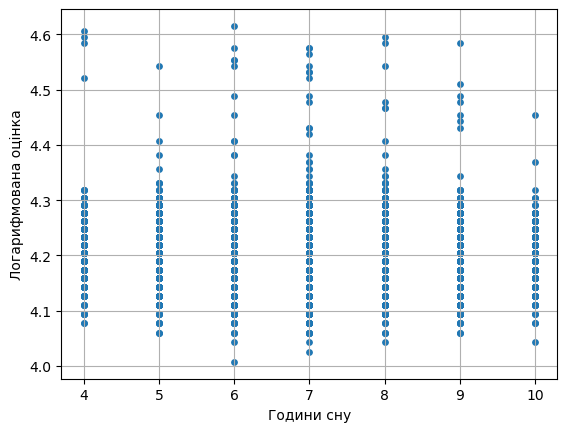

In [10]:
xs = df['Sleep_Hours']
ys = df['Exam_Score'].apply(np.log)
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=15, grid=True)
plt.xlabel('Години сну')
plt.ylabel('Логарифмована оцінка')
plt.show()
## візуально звязок не простежується

In [11]:
df['logarithm'] = df['Exam_Score'].apply(np.log)
correlation = df['Sleep_Hours'].corr(df['logarithm'])
print(f'Коэффіцієнт кореляції Спірмена: {correlation}')

Коэффіцієнт кореляції Спірмена: -0.016235327695475175


In [13]:
##звязок відсутній

In [12]:
m_num = {'High': 3, 'Medium': 2, 'Low': 1}

In [13]:
df['motivational_rank'] = df['Motivation_Level'].map(m_num)
df
##створено новий стовбчик, щоб подати дані в цілочисловому вигляді

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,logarithm,motivational_rank
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Public,Positive,3,No,High School,Near,Male,67,4.204693,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Public,Negative,4,No,College,Moderate,Female,61,4.110874,1
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Public,Neutral,4,No,Postgraduate,Near,Male,74,4.304065,2
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Public,Negative,4,No,High School,Moderate,Male,71,4.262680,2
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Public,Neutral,4,No,College,Near,Female,70,4.248495,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,...,Public,Positive,2,No,High School,Near,Female,68,4.219508,2
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,...,Public,Positive,2,No,High School,Near,Female,69,4.234107,2
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,...,Public,Negative,2,No,Postgraduate,Near,Female,68,4.219508,1
6605,10,86,High,High,Yes,6,91,High,Yes,2,...,Private,Positive,3,No,High School,Far,Female,68,4.219508,3


In [14]:
frequency_motiv_table = df['motivational_rank'].value_counts().sort_index()

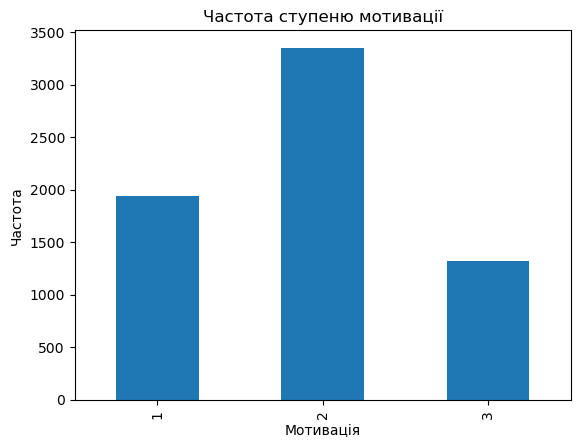

In [15]:
frequency_motiv_table.plot(kind='bar')
plt.xlabel('Мотивація')
plt.ylabel('Частота')
plt.title('Частота ступеню мотивації')
plt.show()

In [16]:
np.random.seed(1)

In [24]:
correlation, p_value = stats.spearmanr(df['motivational_rank'], df['Exam_Score'])

print(f"Кореляція Спірмена: {correlation}")
print(f"p-значення: {p_value}")
##звязок дуже слабкий або відсутній

Кореляція Спірмена: 0.09361373677431065
p-значення: 2.4487612042995383e-14


In [25]:
df['motivational_rank']=df['motivational_rank'].fillna(0)

In [26]:
df['Exam_Score']=df['Exam_Score'].fillna(0)

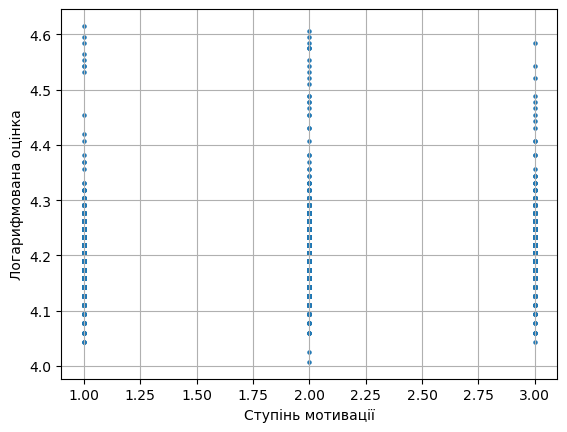

In [27]:
xs = df['motivational_rank']
df['logarithm'] = df['Exam_Score'].apply(np.log)
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=5, grid=True)
plt.xlabel('Ступінь мотивації')
plt.ylabel('Логарифмована оцінка')
plt.show()
##візуально звязок відсутній

In [28]:
a = df.iloc[:, [1, 6]].values
##беру змінні відвідуваність (100б) і попередні оцінки (100б) та застосую метод К-середніх

/Users/adminsha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adminsha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adminsha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adminsha/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

<function matplotlib.pyplot.show(close=None, block=None)>

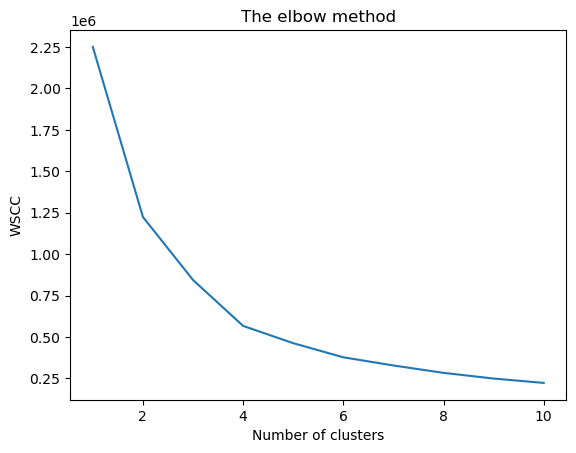

In [29]:
from sklearn.cluster import KMeans
wscc = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(a)
    wscc.append(kmeans.inertia_)
plt.plot(range(1, 11), wscc)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WSCC')
plt.show
метод ліктя задля розуміння кількості кластерів. В х = 5 мізерний перелом, отже кількість кластерів 5.

In [30]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(a)

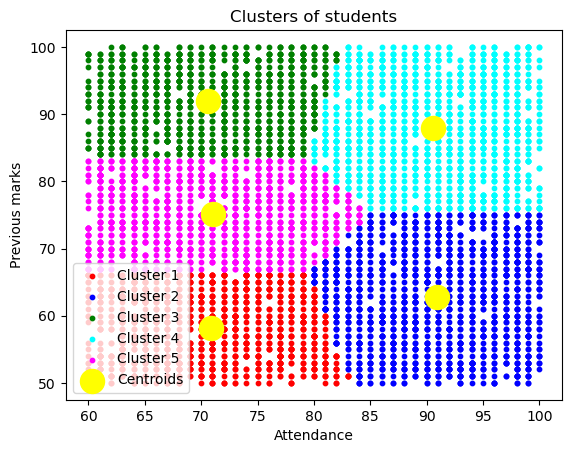

In [32]:
plt.scatter(a[y_kmeans == 0, 0], a[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(a[y_kmeans == 1, 0], a[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(a[y_kmeans == 2, 0], a[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(a[y_kmeans == 3, 0], a[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(a[y_kmeans == 4, 0], a[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('Attendance')
plt.ylabel('Previous marks')
plt.legend()
plt.show()